# Healthcare Dataset

Well, recently I stumbled myself on having interest in healthcare industry. This dataset believed to be augmented to mimic the healthcare dataset, which probably not really, but let's give shout out to the author (prasad22)[https://www.kaggle.com/datasets/prasad22/healthcare-dataset].

In this notebook, I want to use KMeans. For what? Let's see insight correlation of medical condition with its medication. This may answer some odd question like why giving Cancer medical condition a Paracetamol?

*Breaking my habit on using semicolon ; when using Python

In [168]:
import pandas

## Explanatory Data Analysis (EDA)

Here we go again with data analysis. In this section, I'm using Pandas.

In [169]:
dataframe = pandas.read_csv("healthcare_dataset.csv")
dataframe.drop_duplicates()

print(f"Total data: {dataframe['Name'].count()}")

dataframe.head()

Total data: 55500


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [170]:
data_count = {
    "patient_data": len(dataframe["Name"].unique()),
    "medical_condition_data": len(dataframe["Medical Condition"].unique()),
    "medication_data": len(dataframe["Medication"].unique())
}

print("Unique counts")

for key, value in data_count.items():
    print(f"{key} => {value}")

Unique counts
patient_data => 49992
medical_condition_data => 6
medication_data => 5


## Initial Dataset Explanatory

Medicines are vary. The factor of certain types of medicine are prescribed for the patient, should be coorelated with their body condition, gender, and medical condition. However, when landing on "randomly augmented" data, this can be different. So to check things out, I will drop the Name, Date of Admission,  Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admision Type, Discharge Date, and Test Results. 

In [171]:
features = dataframe[["Age", "Gender", "Blood Type", "Medical Condition"]]
label = dataframe["Medication"]

print(f"Features datatype: {type(features)}")
print(f"Label datatype: {type(label)}")

features

Features datatype: <class 'pandas.core.frame.DataFrame'>
Label datatype: <class 'pandas.core.series.Series'>


,Age,Gender,Blood Type,Medical Condition
0,30,Male,B-,Cancer
1,62,Male,A+,Obesity
2,76,Female,A-,Obesity
3,28,Female,O+,Diabetes
4,43,Female,AB+,Cancer
...,...,...,...,...
55495,42,Female,O+,Asthma
55496,61,Female,AB-,Obesity
55497,38,Female,B+,Hypertension
55498,43,Male,O-,Arthritis


In [172]:
label

0        Paracetamol
1          Ibuprofen
2            Aspirin
3          Ibuprofen
4         Penicillin
            ...     
55495     Penicillin
55496        Aspirin
55497      Ibuprofen
55498      Ibuprofen
55499      Ibuprofen
Name: Medication, Length: 55500, dtype: object

In [173]:
# Since a non-supposed-to-be-numerical data cannot be processed directly, 
# we convert these numberfication the value of Gender, Blood Type, Medical Condition, and Medication.

for i in ["Gender", "Blood Type", "Medical Condition"]:
    hot_encoded = pandas.Categorical(features[i]).codes + 1
    features = pandas.concat([features, pandas.Series(hot_encoded, name = f"{i}_onehot")], axis = 1)
    features = features.drop(columns = [i])

hot_encoded = pandas.Categorical(label).codes + 1
label = hot_encoded

In [174]:
features

,Age,Gender_onehot,Blood Type_onehot,Medical Condition_onehot
0,30,2,6,3
1,62,2,1,6
2,76,1,2,6
3,28,1,7,4
4,43,1,3,3
...,...,...,...,...
55495,42,1,7,2
55496,61,1,4,6
55497,38,1,5,5
55498,43,2,8,1


In [175]:
label

array([4, 2, 1, ..., 2, 2, 2], dtype=int8)

## Data Coorelation Check

After we standardize the data, we will perform data coorelation checking against the medication decision.

<Axes: >

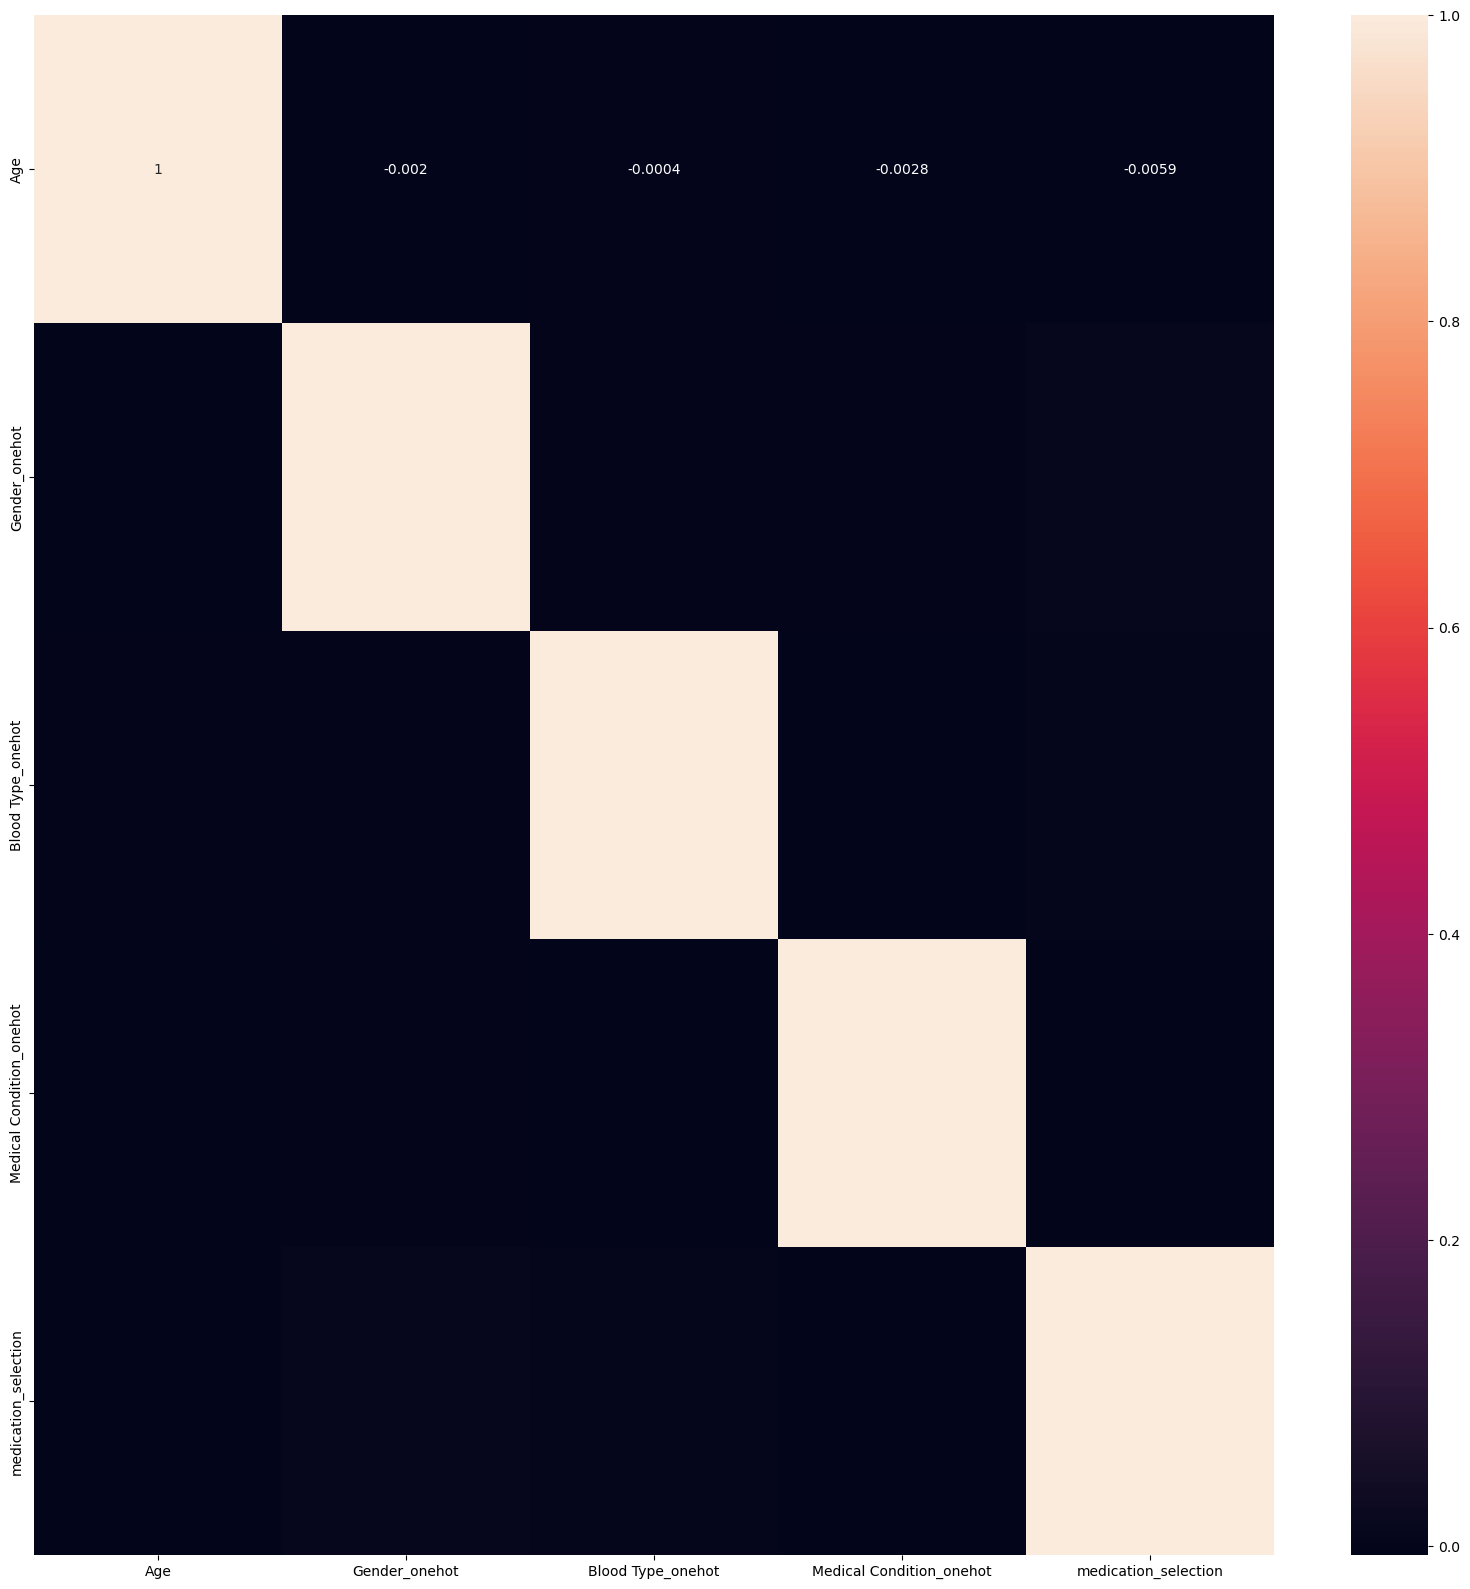

In [176]:
import matplotlib.pyplot as plt
import seaborn

dataframe_for_coorelation = pandas.concat([features, pandas.Series(label, name = "medication_selection")], axis = 1)

data_correlation = dataframe_for_coorelation.corr()

plt.figure(figsize = (20, 20))
seaborn.heatmap(data_correlation, xticklabels = data_correlation.columns, yticklabels = data_correlation.columns, annot = True)

With the coorelation score relatively close to 0 against every variable against the label (in here medical_selection), that's mean, the given medicine has almost no coorelation against the selected data. Hmm strange, but ya this is augmented hospital data. Let's just map the data using KMeans.

To train it, I should split the data into two partitions. The train and the testing. However, since KMeans is an unsupervised machine learning algorithm, unlike the supervised one, we will use the label only for the training for evaluation.

In [177]:
features

,Age,Gender_onehot,Blood Type_onehot,Medical Condition_onehot
0,30,2,6,3
1,62,2,1,6
2,76,1,2,6
3,28,1,7,4
4,43,1,3,3
...,...,...,...,...
55495,42,1,7,2
55496,61,1,4,6
55497,38,1,5,5
55498,43,2,8,1


In [178]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_label, test_label = train_test_split(features, label, test_size = 0.3, random_state = 42)

Working with 2-clusters



Working with 3-clusters



Working with 4-clusters



Working with 5-clusters



Working with 6-clusters



Working with 7-clusters



Working with 8-clusters



Working with 9-clusters





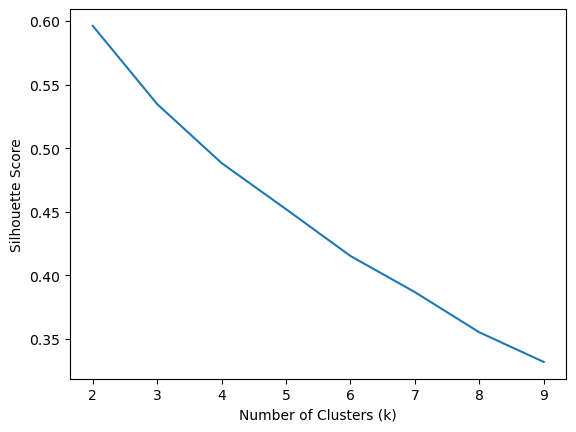

In [179]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    print(f"Working with {k}-clusters")
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = "auto")
    kmeans.fit(train_feature)
    score = silhouette_score(train_feature, kmeans.labels_)
    silhouette_scores.append(score)

    print("\n\n")


plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [180]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

for i in range(2, 10):
    print(f"Working with {i}-clusters")

    model = KMeans(n_clusters = i, random_state = 42, n_init = "auto").fit(train_feature)

    ari = adjusted_rand_score(train_label, model.labels_)
    print(f'Adjusted Rand Index: {ari}')

    predictions = model.predict(test_feature)

    homogeneity = homogeneity_score(test_label, predictions)
    completeness = completeness_score(test_label, predictions)
    v_measure = v_measure_score(test_label, predictions)

    print(f'Homogeneity: {homogeneity}')
    print(f'Completeness: {completeness}')
    print(f'V-Measure: {v_measure}')

    print("\n\n")

Working with 2-clusters
Adjusted Rand Index: -1.9440807904265e-05
Homogeneity: 0.00021055700840195426
Completeness: 0.0004888820438919224
V-Measure: 0.00029434313193043096



Working with 3-clusters
Adjusted Rand Index: -1.3244867945506627e-05
Homogeneity: 0.0001920717494667545
Completeness: 0.00028146206779503647
V-Measure: 0.00022832967699130808



Working with 4-clusters
Adjusted Rand Index: -3.493478904261927e-05
Homogeneity: 0.00022217772673117613
Completeness: 0.0002580917273698274
V-Measure: 0.00023879192309861667



Working with 5-clusters
Adjusted Rand Index: -4.620009587105192e-06
Homogeneity: 0.0004249127282640796
Completeness: 0.00042563451986482007
V-Measure: 0.0004252733178009729



Working with 6-clusters
Adjusted Rand Index: 4.1321008841363195e-07
Homogeneity: 0.0005246739361782785
Completeness: 0.0004737626663840221
V-Measure: 0.0004979202932827397



Working with 7-clusters
Adjusted Rand Index: -3.912448638716417e-05
Homogeneity: 0.0005715026867949878
Completeness: 0.